# PYTORCH WORKFLOW

- **get data ready (turn into tensors)**
- **build or pick a pretrained model**
  - pick a loss function and optimizer
  - build a training loop
- **fit the model to the data and make a prediction**
- **evaluate the model**
- **improve through experimentation**
- **save and reload your trained model**

In [ ]:
import torch 
import torch.nn as nn
import matplotlib.pyplot as plt


In [ ]:
torch.__version__

### get data
- excel
- images of any kind
- videos
- audio
- DNA
- text

machine learning is a game of two parts:
- get data into a numerical representation
- build a model to learn patterns

to showcase this, let's create some _known data_ using the linear regression formula $\{ y_i = f(X_i, \beta) + \epsilon_i \}$. we'll use a linear regression formula to make a straight line with known parameters.

In [ ]:
# create known parameters
weight = .7
bias = .3

# create data
start = 0
end = 1
step = .01
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

In [ ]:
X[:10], len(X)

In [ ]:
y[:10], len(y)

In [ ]:
# splitting the datasset into train (80%) and test set (20%)
train_split = int(.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

In [ ]:
# building a function to visualize our data
def plot_predictions(train_data=X_train, 
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
    """
    Plots traiing data, test data, and compares predictions
    """
    plt.figure(figsize=(10, 7))

    # plot training data in blue
    plt.scatter(train_data, train_labels, c='b', s=4, label='Training Data')

    # plot test data in green
    plt.scatter(test_data, test_labels, c='g', s=4, label='Testing Data')

    # are there predictions?
    if predictions is not None:
        plt.scatter(test_data, predictions, c='r', s=4, label='Predictions')

    # show the legend
    plt.legend(prop={'size':14});

In [ ]:
plot_predictions();

In [ ]:
# creating data
import torch 
import torch.nn as nn
import matplotlib.pyplot as plt

In [ ]:
weight, bias = .7, .3
X = torch.arange(0, 1, .02).unsqueeze(1)
y = weight * X + bias

In [ ]:
X[:5], len(X)

In [ ]:
y[:5], len(y)

In [ ]:
# splitting data into train and test sets
trainsplit = int(.8 * len(X))
xtrain, ytrain = X[:trainsplit], y[:trainsplit]
xtest, ytest = X[trainsplit:], y[trainsplit:]

len(xtrain), len(ytrain), len(xtest), len(ytest)

In [ ]:
def visualize_data(traindata=xtrain,
                   trainlabel=ytrain,
                   testdata=xtest,
                   testlabel=ytest,
                   predictions=None):
    plt.scatter(traindata, trainlabel, c='b', s=5, label='Training set')

    plt.scatter(testdata, testlabel, c='g', s=5, label='Testing set')

    if predictions is not None:
        plt.scatter(testdata, predictions, c='r', s=5, label='Predictions')

    plt.legend(prop={'size':15})

In [ ]:
visualize_data()

In [ ]:
import torch 
import torch.nn as nn

In [ ]:
# builing a linear regression model class
class LinearRegressionMdl(nn.Module):
    def __init__(self):
        super(LinearRegressionMdl, self).__init__()
        self.weights = nn.Parameter(torch.randn(1,
                                                requires_grad=True,
                                                dtype=torch.float
                                                ))
        self.bias = nn.Parameter(torch.randn(1,
                                             requires_grad=True,
                                             dtype=torch.float
                                             ))
        
    def forward(self, x:torch.Tensor):
        y = self.weights * x + self.bias
        return y
        

In [ ]:
# create a rnadom seed
torch.manual_seed(29)

# create an instance of the model
lrmdl = LinearRegressionMdl()

# check the parameters
list( lrmdl.parameters() )

# named parameters
lrmdl.state_dict()  # we wnat to update this parameters to the ideal values above (.7, .3)

In [ ]:
# making prediction using `torch.inference_mode()`
with torch.inference_mode():
    y_pred = lrmdl(xtest)

y_pred

In [ ]:
visualize_data(traindata=xtrain,
                   trainlabel=ytrain,
                   testdata=xtest,
                   testlabel=ytest,
                   predictions=y_pred)

### pytorch model building essentials 
| Pytorch module | What does it do? |
|:--------------:|------------------|
| `torch.nn` | contains all of the building blocks for computational graphs (essentially a series of computations executed in a particular way) |
| `torch.nn.Module` | the base class for all neural network modules, all the building blocks for neural networks are subclasses. If you're building a neural network in pytorch, your models should inheirit `nn.Module`. Requires `forward()` method be implemented. | 
| `torch.optim` | contains various optimization algorithms (these tell the model parameters stored in `nn.Parameter` how to best change to improve the gradient descent and in turn reduce the loss). |
| `torch.utils.data.Dataset` | represents a map between key (label) and sample (features) pairs of your data. such as images and their associated labels. |
| `torch.utils.data.DataLoader` | creates a python iterable over a torch dataset (allows you to iterate over your data). |



In [ ]:
# training our model
torch.manual_seed(97)

# initializing our model
model0 = LinearRegressionMdl()

# print out the parameters
model0.state_dict()

In [ ]:
# making inferences

with torch.inference_mode():
    ypred = model0(xtest)

visualize_data(xtrain, ytrain, xtest, ytest, ypred)

### training a model (things we need)

- **loss function:** a function to measure how wrong your model's predictiions are to the ideal outputs, lower is generally better.
- **optimizer:** takes into account the loss of a model and adjusts the model's parameters (eg: weight and bias in this case) to improve the loss function 

and specifically for pytorch, we need 
- a training loop
- a testing loop

In [ ]:
model0.state_dict()

In [ ]:
# set up a loss function 
criterion = nn.L1Loss()

# set up optimizer
optimizer = torch.optim.SGD(model0.parameters(), lr=0.01)

**Question:** which loss function and optimizer should i use?

**Ans:** this will be problem specific. but with experience, you'll get an idea of what works and doesn't with your particular problem set.

for example, for a regression problem (like this), a loss function of `nn.L1Loss()` and an optimizer like `torch.optim.SGD()` will suffice.

but for a classification problem like classifying whethere a photo is a dog or cat, you'll likely want to luse a loss function of `nn.BCELoss()` (binary cross entropy loss)

**building a training loop (and a testing loop)**

things we need:
- loop throgh the data
- forward pass (this involes data moving through our model's `forward()` function) to make predictions on data - also called forward propagation
- calculate the loss (compare forwad pass predictions to ground truth labels)
- opimiaer zero grad
- loss backward - move backward through the network to calculate the grdients of each of the parameters of our model with resprect to the loss
- optimizer step - use the optimizer to adjust our model's parameters to try and improve the loss (a.k.a gradient descent)



In [ ]:
# an epoch  is one loop through the entire data...
epochs = 1 # hyperparameter because we've set it ourselves

model0.train()
for epoch in range(epochs):
    pass

In [ ]:
import torch 
import torch.nn as nn
import numpy as np 
import matplotlib.pyplot as plt

In [ ]:
# creating synthetic dataset
torch.manual_seed(74)
weight, bias = .7, .3
X = torch.arange(0, 1, .01).unsqueeze(dim=-1)
y = weight * X + bias

trainsize = int(.8 * len(X)) # 80% of the dataset
xtrain, xtest = X[:trainsize], X[trainsize:]
ytrain, ytest = y[:trainsize], y[trainsize:]

print(X.shape, y.shape)
print(len(xtrain), len(ytrain), len(xtest), len(ytest))

In [ ]:
# visualize data

def viz_data(trainset=xtrain,
             trainlabel=ytrain,
             testset=xtest,
             testlabel=ytest,
             predictions=None):
    
    plt.figure(figsize=(10, 7))
    plt.scatter(trainset, trainlabel, c='g', s=4, label='Trainset')
    plt.scatter(testset, testlabel, c='b', s=4, label='Testset')

    if predictions is not None:
        plt.scatter(testset, predictions, c='r', s=4, label='Predictions')

    plt.legend()
    plt.show()

viz_data()


In [ ]:
# creating model 
class SimpleReg(nn.Module):
    def __init__(self):
        super(SimpleReg, self).__init__()
        self.weight = nn.Parameter(torch.randn(1,
                                               requires_grad=True,
                                               dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1,
                                             requires_grad=True,
                                             dtype=torch.float))

    def forward(self, x:torch.Tensor):
        return self.weight * x + self.bias
    
mdl = SimpleReg() # creating model instance

In [ ]:
# # loss and optimizer function
# criterion = nn.L1Loss()
# optimizer = torch.optim.SGD(mdl.parameters(), lr=0.1)

In [ ]:
# # testing current random parameters predictive power
# # torch.manual_seed(29)
# mdl.eval()

# with torch.inference_mode():
#     ypred = mdl(xtest)

# viz_data(xtrain, ytrain, xtest, ytest, ypred)

In [ ]:
# mdl.state_dict() # parameters before the training loop

In [ ]:
# # training loop

# epochs = 50

# for epoch in range(epochs):
#     mdl.train()
#     optimizer.zero_grad() #
#     ypred = mdl(xtrain) # forward pass
#     loss = criterion(ypred, ytrain) # calcuting loss b/n predicted and ground truth
#     loss.backward() # perform backpropagation on the loss function
#     optimizer.step() # perform gradient descent (gradient update)
#     print(
#         f'Epoch = {epoch} || Loss = {loss.item()}'
#     )
#     print(
#         mdl.state_dict()
#     )
#     print()

In [ ]:
# mdl.state_dict() # parameters after the training loop

In [ ]:
# # torch.manual_seed(29)
# mdl.eval()

# with torch.inference_mode():
#     ypred = mdl(xtest)

# viz_data(xtrain, ytrain, xtest, ytest, ypred)

## Writing a testing loop

In [ ]:
# putting the training and testing loop together

epochs = 201
criterion = nn.L1Loss()
optimizer = torch.optim.SGD(mdl.parameters(), lr=0.01)

# track model performance
epoch_count = []
loss_values = []
test_loss_values = []

for epoch in range(epochs):
    mdl.train()
    optimizer.zero_grad()
    ypred = mdl(xtrain)
    train_loss = criterion(ypred, ytrain)
    train_loss.backward()
    optimizer.step()

    mdl.eval()
    with torch.inference_mode():
        output = mdl(xtest)
        test_loss = criterion(output, ytest)

    if epoch % 40 == 0:
        epoch_count.append(epoch)
        loss_values.append(train_loss.item())
        test_loss_values.append(test_loss.item())
        print(
            f'Epoch: {epoch+1} | Train Loss: {train_loss.item()} | Test Loss: {test_loss.item()}'
        )
        print(mdl.state_dict())
        # print()
        viz_data(xtrain, ytrain, xtest, ytest, output)

In [ ]:
# plot the loss  curves
plt.plot(epoch_count, loss_values, label='Train Loss', color='green')
plt.plot(epoch_count, test_loss_values, label='Test Loss', color='red')
plt.title('Trianing and Test loss curves')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()

## Saving and Loading a Model

There are three main methods you should know about for saving and loading models in PyTorch
- `torch.save()` allows you to save a pytorch object in python's pickle format
- `torch.load()` allows you to load a saved pytorch object
- `torch.nn.Module.load_state_dict()` allows you to laod a model's saved state dictionary

_A common PyTorch convention is to save models using either a `.pt` or `.pth` file extension._

| saving state dict | saving entire model |
|-------------------|---------------------|
| **Pros** | **Pros** |
| lightweight: saving and loading just the state dictionary is generally more space efficient as it only stores the parameters of the model | comprehensize: saves not only the parameters but also the entire model architecture, including methods, parameters, and buffers |
| flexibility: allows for selective loading of specific parts of the model, which can be useful for transfer learning or fine-tuning tasks | ease of use: it's straightforward to save and load the entire model, especially if the model architecture may change over time. |
| ease of maintenance: since it only saves the parameters, it easier to manage and version control | portability: the entire model can be loaded in different environments without needing to re-define the architecture |
|  |  |
| **cons** | **cons** |
| dependency on model architecture: loading the state dictionary requires the exact model architecture to be defined beforehand. Changes in the model architecture can lead to compatibility issues. | disk space: the entire model can be significantly larger compared to just saving the state dictionary, consuming more disk space |
| not portable across frameworks: state dictionaries saved pytorch may not be compatible with other deep learning frameworks | version control challenges: saving the entire model may complicate version control, especially if the model architecture undergoes frequent changes |
|  | compatibility issues: loading models saved in different pytorch versions might lead to compatibility issues, especially if there are changes in the serialization format |

In [ ]:
ls

In [ ]:
# saving our pytorch (simpolereg) model 
# option 1: saving the state dict 
torch.save(mdl.state_dict(), './models/chp1_simplereg.pth')

In [ ]:
# to load in a saved state_dict we have to instantiate a new instance of our model class
loadedmdl = SimpleReg() # initialize it with the name of the model class
# current model parameters are random 
loadedmdl.state_dict()

In [ ]:
# load the saved state_dict of mdl (this will update the new instance with updated parameters of our trained model)
loadedmdl.load_state_dict(torch.load('./models/chp1_simplereg.pth'))
# showing current model paramters after loading saved model 
loadedmdl.state_dict()

## putting everythin in chp1 together! let's go!!!

1. data (preparation and loading)
2. spliting data into train and test sets
3. building model and viz data
4. writing a train loop - define: loss function, and optimizer
5. writing a testing loop - define: loss function
6. saving the model in pytorch
7. loading the model 

In [1]:
import torch 
import torch.nn as nn 
from torch.utils.data import Dataset, DataLoader, TensorDataset
import matplotlib.pyplot as plt
import torch.optim as optim 
from torch.nn import L1Loss

### Data - creating, spliting (and creating dataloader)

In [2]:
# creating data
torch.manual_seed(91)
weight, bias = .7, .3 # known parameters to estimate
X = torch.arange(0, 5, 0.001).unsqueeze(dim=1)
y = weight * X + bias 

# splitting data into train and test sets
splitratio = int(.8 * len(X))
xtrain, ytrain = X[:splitratio], y[:splitratio] # train set
xtest, ytest = X[splitratio:], y[splitratio:] # test set

# creating tensor datasets
trainset = TensorDataset(xtrain, ytrain)
testset = TensorDataset(xtest, ytest)

# creating dataloader 
trainloader = DataLoader(
    dataset=trainset,
    batch_size=32,
    shuffle=True,
)
# testloader = DataLoader(
#     dataset=testset,
#     batch_size=64,
#     shuffle=True,
# )

print(
    f' Train set size: {xtrain.shape} \nTest set size: {xtest.shape}'
)

 Train set size: torch.Size([4000, 1]) 
Test set size: torch.Size([1000, 1])


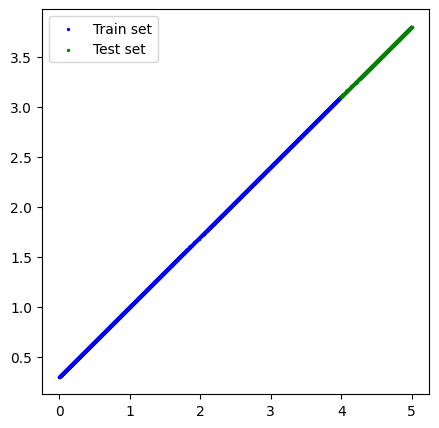

In [3]:
# visualizaing the data

def vizdata(xtrain, ytrain, xtest, ytest, pred=None):
    plt.figure(figsize=(5,5))
    plt.scatter(xtrain, ytrain, color='b', s=2, label='Train set')
    plt.scatter(xtest, ytest, color='g', s=2, label='Test set')

    if pred is not None:
        plt.scatter(xtest, pred, color='r', s=2, label='Predictions')

    plt.legend()
    plt.show()

vizdata(xtrain, ytrain, xtest, ytest)

### Creating a simple Regression Model

In [4]:
class xRegModel(nn.Module):
    def __init__(self):
        super(xRegModel, self).__init__()
        # self.weight = nn.Parameter(torch.rand(1,
        #                                       requires_grad=True, dtype=torch.float))
        # self.bias = nn.Parameter(torch.randn(1,
        #                                      requires_grad=True, dtype=torch.float))
        self.linear_layer = nn.Linear(1,1)

    def forward(self, x:torch.Tensor):
        return self.linear_layer(x) # self.weight * x + self.bias
    
torch.manual_seed(91)
xMdl = xRegModel() # creating a model instance
print(xMdl.state_dict()) # show current parameter state

OrderedDict([('linear_layer.weight', tensor([[-0.0862]])), ('linear_layer.bias', tensor([0.2815]))])


### Training and Testing Loop

Epoch: 0  |  Train Loss: 1.5904738903045654  |  Test Loss: 3.4559073448181152
OrderedDict([('linear_layer.weight', tensor([[-0.0662]])), ('linear_layer.bias', tensor([0.2915]))])


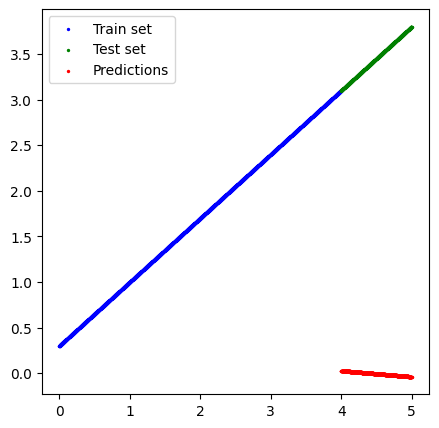


Epoch: 10  |  Train Loss: 1.0957932472229004  |  Test Loss: 2.4597673416137695
OrderedDict([('linear_layer.weight', tensor([[0.1336]])), ('linear_layer.bias', tensor([0.3885]))])


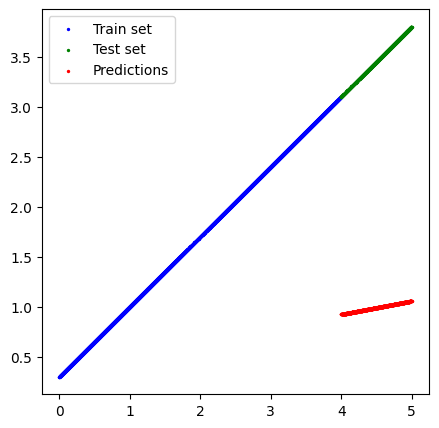


Epoch: 20  |  Train Loss: 0.6272262930870056  |  Test Loss: 1.4837416410446167
OrderedDict([('linear_layer.weight', tensor([[0.3315]])), ('linear_layer.bias', tensor([0.4745]))])


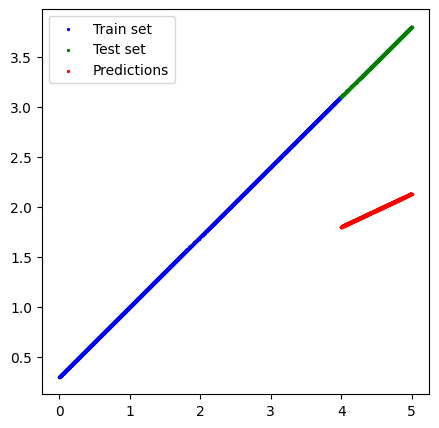


Epoch: 30  |  Train Loss: 0.2370215654373169  |  Test Loss: 0.5934903025627136
OrderedDict([('linear_layer.weight', tensor([[0.5156]])), ('linear_layer.bias', tensor([0.5362]))])


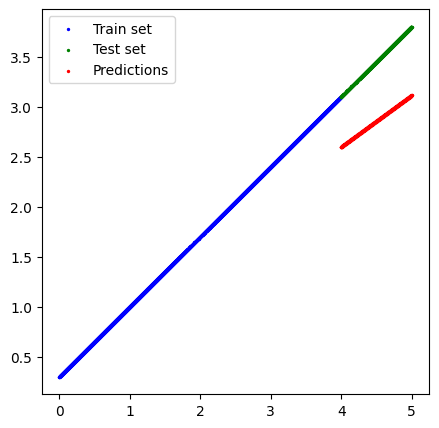


Epoch: 40  |  Train Loss: 0.1003338098526001  |  Test Loss: 0.16280438005924225
OrderedDict([('linear_layer.weight', tensor([[0.6112]])), ('linear_layer.bias', tensor([0.5366]))])


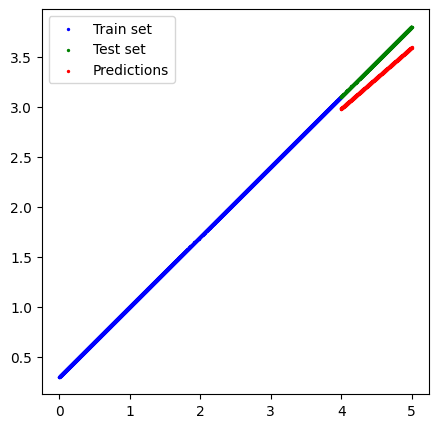


Epoch: 50  |  Train Loss: 0.08482804149389267  |  Test Loss: 0.12990711629390717
OrderedDict([('linear_layer.weight', tensor([[0.6265]])), ('linear_layer.bias', tensor([0.5007]))])


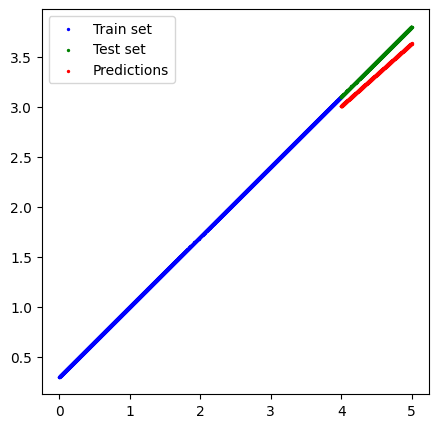


Epoch: 60  |  Train Loss: 0.0696307048201561  |  Test Loss: 0.10617716610431671
OrderedDict([('linear_layer.weight', tensor([[0.6399]])), ('linear_layer.bias', tensor([0.4641]))])


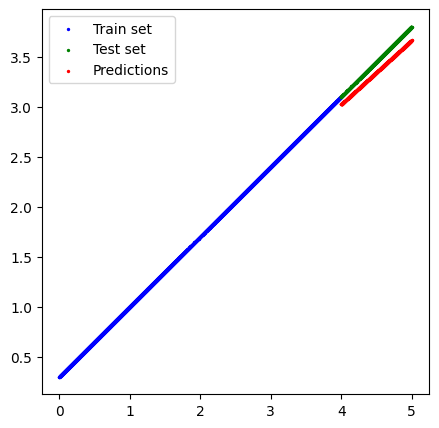


Epoch: 70  |  Train Loss: 0.054433465003967285  |  Test Loss: 0.08251390606164932
OrderedDict([('linear_layer.weight', tensor([[0.6533]])), ('linear_layer.bias', tensor([0.4275]))])


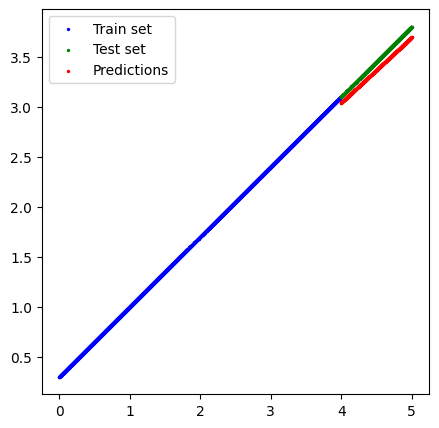


Epoch: 80  |  Train Loss: 0.0392361581325531  |  Test Loss: 0.05878383666276932
OrderedDict([('linear_layer.weight', tensor([[0.6667]])), ('linear_layer.bias', tensor([0.3909]))])


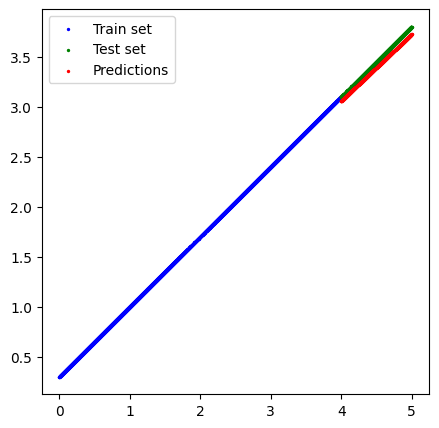


Epoch: 90  |  Train Loss: 0.024038884788751602  |  Test Loss: 0.035120993852615356
OrderedDict([('linear_layer.weight', tensor([[0.6801]])), ('linear_layer.bias', tensor([0.3542]))])


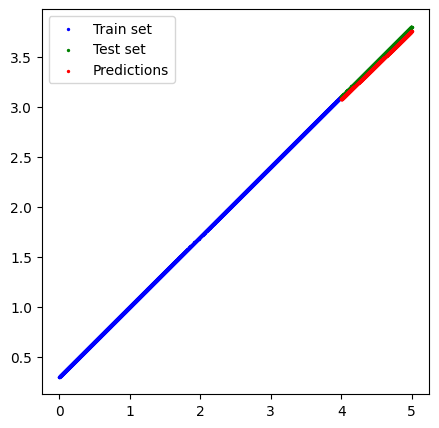


Epoch: 100  |  Train Loss: 0.00941993948072195  |  Test Loss: 0.04860834404826164
OrderedDict([('linear_layer.weight', tensor([[0.6858]])), ('linear_layer.bias', tensor([0.3151]))])


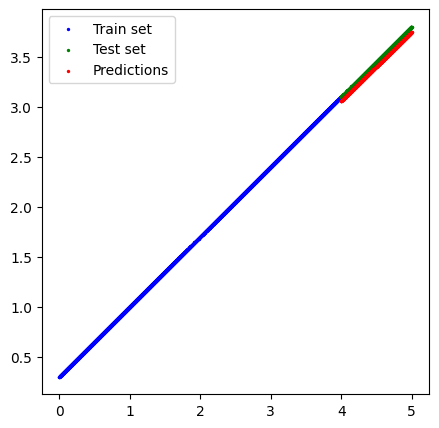

In [5]:
xMdl.train() # setting the model to the train state
criterion = L1Loss()
optimizer = optim.SGD(xMdl.parameters(), lr=0.01)

# saving train and test losses
epoch_checkpoint = []
trainloss = []
testloss = []

epochs = 101
for epoch in range(epochs):
    # training loop 
    #for xn, yn in trainloader: # i want to visualize the data
    optimizer.zero_grad()
    output = xMdl(xtrain) # running forward pass
    loss1 = criterion(output, ytrain) # calculating differences between predicted and ground truth
    loss1.backward() # computing gradient with respect to the loss
    optimizer.step() # applying gradient update view backpropagation

    # testing loop
    xMdl.eval() # setting model to evaluation mode
    with torch.inference_mode():
        # for xs, ys in testloader: # because i want to vizualize the entire data
        ypred = xMdl(xtest)
        loss2 = criterion(ypred, ytest)

    # saving losses after 10 epochs
    if epoch % 10 == 0:
        train_loss = loss1.item() #/ len(trainloader)
        test_loss = loss2.item() #/ len(testloader)
        epoch_checkpoint.append(epoch)
        trainloss.append(train_loss)
        testloss.append(test_loss)
        print(
            f'Epoch: {epoch}  |  Train Loss: {train_loss}  |  Test Loss: {test_loss}'
        )
        print(xMdl.state_dict())
        vizdata(xtrain, ytrain, xtest, ytest, ypred)
        print()


### Plotting training and testing loss curves

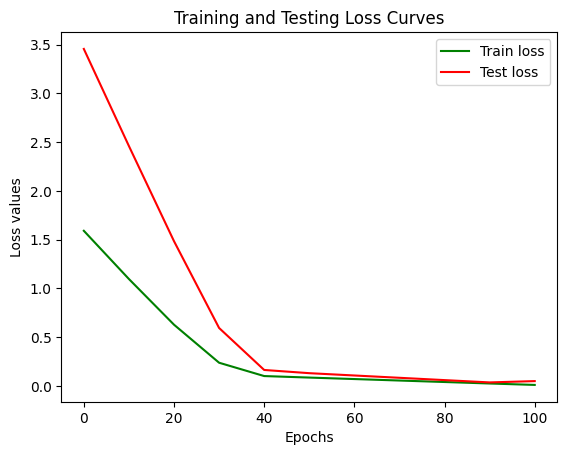

In [6]:
plt.plot(epoch_checkpoint, trainloss, color='g', label='Train loss')
plt.plot(epoch_checkpoint, testloss, color='r', label='Test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss values')
plt.title('Training and Testing Loss Curves')
plt.legend()
plt.show()

### saving and loading the model

In [7]:
# saving the model's learned parameters (state dict)
torch.save(xMdl.state_dict(), './models/new_simple_reg_mdl.pth')

# loading the model into a new instance
zMdl = xRegModel()
print(zMdl.state_dict()) # initial parameters set by some random distribution

zMdl.load_state_dict(torch.load('./models/new_simple_reg_mdl.pth'))
print(zMdl.state_dict()) # updated parameters from saved model 

OrderedDict([('linear_layer.weight', tensor([[-0.5415]])), ('linear_layer.bias', tensor([-0.2226]))])
OrderedDict([('linear_layer.weight', tensor([[0.6858]])), ('linear_layer.bias', tensor([0.3151]))])
